

***Описание целей и задачи проекта***
Цель проекта - разработать модель для предсказания стоимости автомобиля на вторичном рынке на основе имеющего датасета.


***Описание полей данных***

 - 'year' - год производства
 - 'make' - производитель
 - 'model' - модель
 - 'trim' - модификация
 - 'body' - тип кузова
 - 'transmission' - тип КПП
 - 'vin' - идентификатор (вин)
 - 'state' - штат регистрации
 - 'condition' - состояние по шкале (1-5)
 - 'odometer' - пробег в милях (количественная переменная)
 - 'color' - цвет кузова
 - 'interior' - цвет интерьера
 - 'seller' - продавец
 - 'sellingprice' - стоимость продажи
 - 'saledate' - дата продажи

***План работы***

В проекте необходимо посчитать стоимость автомобиля на вторичном рынке - следовательно перед нами стоит задача регресии.

 - загрузка и ознакомление с данными,
 - предварительная обработка,
 - проверка на мультиколлинеарность,
 - отбор финального набора обучающих признаков,
 - выбор и обучение моделей,
 - итоговая оценка качества предсказания лучшей модели,
 - анализ важности ее признаков.


Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!
Предлагаем вам принять участие в Мастерской, в рамках которой вы сможете поработать с данными о продажах автомобилей на вторичном рынке. Целью вашего проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

***Подготовка данных***


Тут будут все import

In [51]:
#загрузка библиотек, методов и пр

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import stats as st
from numpy.random import RandomState
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [52]:
#тренирвочные данные
from io import BytesIO
import requests
spreadsheet_id = '1e_UUJO6-CQTZNJBwUheKTVyO_tDulEr_A4F-OEtR3EQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_train = pd.read_csv(BytesIO(r.content))
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [53]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [54]:
#sample submition  данные
from io import BytesIO
import requests
spreadsheet_id = '1grOCCtEWtQZh9hMifqD6aGzhYBpmlMTsWgPU7Xk0Sn4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
sample_submition = pd.read_csv(BytesIO(r.content))
print(sample_submition.head())

                 vin  sellingprice
0  1g6dp567450124779   4359.648813
1  1gtw7fca7e1902207  20820.812029
2  jn8az1mw6dw303497  19730.896416
3  2g1wf5e34d1160703  10417.514331
4  1n6aa0ec3dn301209  26142.936612


***Вывод:***
   
1) Есть пропуски в колонках make,model, trim, body,  transmission, condition, odometer, color, interior. 
Так как в тестовых данных эти колонки есть, поэтому удалять строки с проспуками в тренировочной базе не будем, а заменим пропуски на нули.

2) Необходимо провести предобработку данных и проверить наличие явных и неявных дубликатов.

***ПРЕДОБРАБОТКА ДАННЫХ***

1. Проверим данные на наличиие пропусков, дубликатов янных и нет, оценим разброс данных.

In [55]:
#посчитаем пропуски
data_train.isna().sum()

year                0
make             8043
model            8123
trim             8337
body            10393
transmission    51461
vin                 0
state               0
condition        9405
odometer           69
color             586
interior          586
seller              0
sellingprice        0
saledate            0
dtype: int64

2. Приведем данные в нижнему регистру и проверим наличие дубликатов.

In [56]:
#обрабоатем неявные дубликаты, приведя названия в колонке к нижнему регистру 
data_train['make'] = data_train['make'].str.lower()
data_train['model'] = data_train['model'].str.lower()
data_train['trim'] = data_train['trim'].str.lower()
data_train['body'] = data_train['body'].str.lower()
data_train['transmission'] = data_train['transmission'].str.lower()
data_train['state'] = data_train['state'].str.lower()
data_train['color'] = data_train['color'].str.lower()
data_train['interior'] = data_train['interior'].str.lower()

In [57]:
#считаем количество дубликатов

print('Дубликаты в данных по VIN-номеру:')
print( data_train['vin'].duplicated().sum())



Дубликаты в данных по VIN-номеру:
0


3.Проверим какие уникальные значения имеют категориальные переменные по колонкам make, model, trim, body, transmition, condition, color, interior. Заменим, где это возможно, неявные дубликаты в признаках.

In [58]:
#признак год сделаем категориальным
data_train['year'].unique()
#data_train['year'] = data_train['year'].astype(object)

array([2011, 2014, 2012, 2003, 2007, 2013, 2010, 2000, 2005, 2006, 2004,
       2008, 2009, 2015, 2002, 2001, 1999, 1998, 1996, 1997, 1994, 1995,
       1993, 1989, 1991, 1988, 1987, 1990, 1992, 1985, 1986, 1983, 1984,
       1982], dtype=int64)

In [59]:
#обрабоатем неявные дубликаты
#data_train['make'].unique()
data_train['make'].value_counts().head(20)

ford             74067
chevrolet        47818
nissan           42866
toyota           31711
dodge            24294
honda            21600
hyundai          17187
bmw              16254
kia              14325
chrysler         13796
mercedes-benz    13345
infiniti         12123
jeep             12107
volkswagen        9883
lexus             9363
gmc               8357
mazda             6703
cadillac          5958
acura             4679
audi              4635
Name: make, dtype: int64

Унифицираем название авто, проведем следующие замены:
'honda' на 'hyundai'
'mercedes-benz' на mercedes'
'mercedes-b' на mercedes'
'vw' на 'volkswagen'
'landrover' на 'land rover'
'dodge tk' на 'dodge truck
'mazda tk' на 'mazda truck

In [60]:
#унифицирем названия и заменим неявные дубликаты
data_train['make'] = data_train['make'].replace ('honda','hyundai')
data_train['make'] = data_train['make'].replace ('mercedes-benz','mercedes')
data_train['make'] = data_train['make'].replace ('mercedes-b','mercedes')
data_train['make'] = data_train['make'].replace ('vw','wolkswagen')
data_train['make'] = data_train['make'].replace ('landrover','land rover')
data_train['make'] = data_train['make'].replace ('dodge tk','dodge truck')
data_train['make'] = data_train['make'].replace ('mazda tk','mazda truck')
#data_train['make'].unique()



In [61]:
data_train['make'] = data_train['make'].replace ('mazda tk','mazda truck')
data_train['model'] = data_train['model'].replace ('mazdaspeed mazda3','mazdaspeed 3')
data_train['model'] = data_train['model'].replace ('mazdaspeed3','mazdaspeed 3')
data_train['model'] = data_train['model'].replace ('3','mazdaspeed 3')
data_train['model'] = data_train['model'].replace ('rx8','rx-8')
data_train['model'] = data_train['model'].replace ('6','mazda6')
data_train['model'] = data_train['model'].replace ('mazdaspeed mx-5 miata','mx-5 miata')
data_train['model'] = data_train['model'].replace ('mazdaspeed protege','protege')
data_train['model'] = data_train['model'].replace ('b-series truck','b-series pickup')
data_train['model'] = data_train['model'].replace ('truck','b-series pickup')
data_train['model'] = data_train['model'].replace ('b-series','b-series pickup')
data_train['model'] = data_train['model'].replace ('mazdaspeed mazda6','mazda6')
data_train['model'] = data_train['model'].replace ('mazdaspeed 3','mazda3')
data1 = data_train.query('make == "chevrolet"')

In [62]:
data1 = data_train.query('make == "ford"')
data_train['model'] = data_train['model'].replace ('mazdaspeed mx-5 miata','mx-5 miata')
data_train['model'] = data_train['model'].replace ('e-150','e150')
data_train['model'] = data_train['model'].replace ('e-250','e250')
data_train['model'] = data_train['model'].replace ('e-350','e350')
data_train['model'] = data_train['model'].replace ('f250','f-250 super duty')

#рассматривали аткже вариант упроситить название моделей, но на практике это приведло к снижению показателя MAPE
#data_train['model'] = data_train['model'].replace ('f150','f-150')
#data_train['model'] = data_train['model'].replace ('f-150 heritage','f-150')
#data_train['model'] = data_train['model'].replace ('f-150 svt lightning','f-150')
#data_train['model'] = data_train['model'].replace ('f-350 super duty','f-350')
#data_train['model'] = data_train['model'].replace ('f350','f-350')
#data_train['model'] = data_train['model'].replace ('f-250 super duty','f-250')
#data_train['model'] = data_train['model'].replace ('f-250 super duty','f-250')
#data_train['model'] = data_train['model'].replace ('c-max hybrid','c-max')
#data_train['model'] = data_train['model'].replace ('c-max energi','c-max')
#data_train['model'] = data_train['model'].replace ('explorer sport','explorer')
#data_train['model'] = data_train['model'].replace ('mustang svt cobra','mustang')
#data_train['model'] = data_train['model'].replace ('expedit','expedition')
#data_train['model'] = data_train['model'].replace ('focus st','focus')
#data_train['model'] = data_train['model'].replace ('fusion energi','fusion')
#data_train['model'] = data_train['model'].replace ('fusion hybrid','fusion')
#data_train['model'] = data_train['model'].replace ('explorer sport trac','explorer')
#data_train['model'] = data_train['model'].replace ('expeditn','explorer')
#data_train['model'] = data_train['model'].replace ('expedition el','explorer')


#print(data1['model'].value_counts())

In [63]:
data1 = data_train.query('make == "chevrolet"')
data_train['model'] = data_train['model'].replace ('1500','silverado 1500')

#упрощение
#data_train['model'] = data_train['model'].replace ('2500','sierra 2500')
#data_train['model'] = data_train['model'].replace ('g2500','sierra 2500')
#data_train['model'] = data_train['model'].replace ('c/k 2500 series','sierra 2500')
#data_train['model'] = data_train['model'].replace ('c/k 3500 series','silverado 3500')
#data_train['model'] = data_train['model'].replace ('3500','silverado 3500')
#data_train['model'] = data_train['model'].replace ('s-10 blazer','blazer')
#data_train['model'] = data_train['model'].replace ('trailblazer ext','blazer')
#data_train['model'] = data_train['model'].replace ('trailblazer ext','blazer')
#data_train['model'] = data_train['model'].replace ('sierra 2500','sierra 2500')
#data_train['model'] = data_train['model'].replace ('capt ','captiva sport')
#data_train['model'] = data_train['model'].replace ('silverado 1500 classic','silverado 1500')
#data_train['model'] = data_train['model'].replace ('silverado 1500hd','silverado 1500')
#data_train['model'] = data_train['model'].replace ('1500','silverado 1500')
#data_train['model'] = data_train['model'].replace ('c/k 1500 series','silverado 1500')
#data_train['model'] = data_train['model'].replace ('g3500','silverado 3500')
#data_train['model'] = data_train['model'].replace ('silverado 2500hd classic','silverado 2500')
#data_train['model'] = data_train['model'].replace ('silverado 1500 hybrid','silverado 1500')
#data_train['model'] = data_train['model'].replace ('g3500','silverado 1500')
#data_train['model'] = data_train['model'].replace ('silverado 2500hd ','silverado 2500')
#data_train['model'] = data_train['model'].replace ('silverado 3500 classic','silverado 3500')
#data_train['model'] = data_train['model'].replace ('tahoe limited/z71','tahoe')
#data_train['model'] = data_train['model'].replace ('tahoe hybrid','tahoe')
#data_train['model'] = data_train['model'].replace ('g1500','silverado 1500')
#data_train['model'] = data_train['model'].replace ('impala limited','impala')
#data_train['model'] = data_train['model'].replace ('s-10','blazer')
#data_train['model'] = data_train['model'].replace ('s10','blazer')
#data_train['model'] = data_train['model'].replace ('capt','captiva sport')
#data_train['model'] = data_train['model'].replace ('malibu maxx','malibu')
#data_train['model'] = data_train['model'].replace ('malibu classic','malibu')
#data_train['model'] = data_train['model'].replace ('3500 ','silverado 3500')
#data_train['model'] = data_train['model'].replace ('corvette stingray','corvette')
#data_train['model'] = data_train['model'].replace ('spark ev ','spark')
#data_train['model'] = data_train['model'].replace ('black diamond avalanche','avalanche')
#data_train['model'] = data_train['model'].replace ('malibu hybrid','malibu')
#data_train['model'] = data_train['model'].replace ('malibu hybrid ','malibu')

data_train = (data_train.query('model != "comm"'))
data_train = (data_train.query('model != "uplandr"'))
#print(data1['model'].value_counts())

In [64]:
data1 = data_train.query('make == "toyota"')
data_train['model'] = data_train['model'].replace ('pathfind ','pathfinder')

#упрещение названия моделей
#data_train['model'] = data_train['model'].replace ('camry hybrid','camry')
#data_train['model'] = data_train['model'].replace ('highlander hybrid','highlander')
#data_train['model'] = data_train['model'].replace ('camry hybrid','camry')
#data_train['model'] = data_train['model'].replace ('camry solara','camry')
#data_train['model'] = data_train['model'].replace ('prius c','prius')
#data_train['model'] = data_train['model'].replace ('prius v','prius')
#data_train['model'] = data_train['model'].replace ('prius plug-in','prius')
#data_train['model'] = data_train['model'].replace ('avalon hybrid','avalon')

#print(data1['model'].value_counts())

In [65]:
data1 = data_train.query('make == "dodge"')
data_train['model'] = data_train['model'].replace ('ram3500 ','ram pickup 3500')
data_train['model'] = data_train['model'].replace ('b1500','ram pickup 1500')
data_train['model'] = data_train['model'].replace ('gr','grand')
#print(data1['model'].value_counts())

In [66]:
data1 = data_train.query('make == "bmw"')
data_train['model'] = data_train['model'].replace ('x5','5 series')
data_train['model'] = data_train['model'].replace ('x3','3 series')
data_train['model'] = data_train['model'].replace ('x1','1 series')

data_train['model'] = data_train['model'].replace ('x6','6 series')
data_train['model'] = data_train['model'].replace ('x4','4 series')
data_train['model'] = data_train['model'].replace ('7','7 series')

#print(data1['model'].value_counts())

In [67]:
data1 = data_train.query('make == "chrysler"')
data_train['model'] = data_train['model'].replace ('twn&country','town and country')
data_train['model'] = data_train['model'].replace ('twn/cntry','town and country')
data_train['model'] = data_train['model'].replace ('pt','pt cruiser')
data_train['model'] = data_train['model'].replace ('town','town and country')
#print(data1['model'].value_counts())

In [68]:
data1 = data_train.query('make == "mercedes"')
data_train['model'] = data_train['model'].replace ('500-class','s-class')
data_train['model'] = data_train['model'].replace ('c240w','c-class')
data_train['model'] = data_train['model'].replace ('c230wz','c-class')
data_train['model'] = data_train['model'].replace ('300e','e-class')
data_train['model'] = data_train['model'].replace ('cl55','c-class')
data_train['model'] = data_train['model'].replace ('s55','s-class')
data_train['model'] = data_train['model'].replace ('b200','b-class')
data_train['model'] = data_train['model'].replace ('b-class electric drive','b-class')
data_train['model'] = data_train['model'].replace ('c240s','c-class')
data_train['model'] = data_train['model'].replace ('c230','c-class')
data_train['model'] = data_train['model'].replace ('sl55','s-class')
data_train['model'] = data_train['model'].replace ('g500','g-class')
data_train['model'] = data_train['model'].replace ('g55','g-class')
data_train['model'] = data_train['model'].replace ('ml55 amg','m-class')
data_train['model'] = data_train['model'].replace ('420sel','s-class')
data_train['model'] = data_train['model'].replace ('e300dt','e-class')
data_train['model'] = data_train['model'].replace ('420-class','s-class')

#print(data1['model'].value_counts())

In [69]:
data1=data_train.query('make == "nissan"')

#nissan - упрощение
#data_train['model'] = data_train['model'].replace ('versa note','versa')
#data_train['model'] = data_train['model'].replace ('rogue select','rogue')
#data_train['model'] = data_train['model'].replace ('altima hybrid','altima')
#data_train['model'] = data_train['model'].replace ('murano crosscabriolet','murano')
#data_train['model'] = data_train['model'].replace ('pathfind','pathfinder')

#print(data1['model'].value_counts())

In [70]:
data_train['trim'].unique()

array(['sel', 'se', '2.0 sl', ..., '2.5 x l.l.bean edition',
       '3500 high roof 140 wb', '4x4 v6 xlt sport'], dtype=object)

In [71]:
data1 = data_train.query('make == "jeep"')
data_train['model'] = data_train['model'].replace ('grand','grand cherokee')

#print(data1['model'].value_counts())

In [72]:
data1 = data_train.query('make == "gmc"')
data_train['model'] = data_train['model'].replace ('safari cargo','safari')
data_train['model'] = data_train['model'].replace ('sierra 1500 hybrid','sierra 1500hd')

#print(data1['model'].value_counts())

In [73]:
# Просмотр уникальных названий типов кузова
df1= data_train['body']
df1= df1.sort_values()
df1=df1.unique()

#print(df1)

In [74]:
#замена неявных дубликатов  в типе кузова
data_train['body'] = data_train['body'].replace ('regular-cab','regular cab')

In [75]:
data_train['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

In [76]:
#пропуски в графе 'condition' заменим на заполним значением -1 , а потом признакми в этой графе сделаем с типом object, 
#чтобы после кодировки они стали категориальынми значаниями


data_train['condition'] = data_train['condition'].astype(object)
print(data_train['condition'].unique())

[4.2 3.5 2.2 2.8 2.0 2.5 3.4 4.8 1.9 1.0 3.1 2.7 3.6 2.9 4.1 2.6 2.1 3.0
 4.9 4.7 4.0 3.3 3.8 3.7 4.5 4.6 5.0 4.3 2.4 2.3 3.9 nan 3.2 4.4 1.4 1.5
 1.7 1.2 1.3 1.6 1.8 1.1]


In [77]:
data_train['color'] = data_train['color'].replace ('off-white','white')
data_train['color'] = data_train['color'].replace ('charcoal','gray')
print(data_train[data_train['color'] == 'charcoal'].count)
print(data_train[data_train['color'] == 'off-white'].count)
data_train['color'] = data_train['color'].replace ('—','nan')
data_train['color'].unique()

<bound method DataFrame.count of Empty DataFrame
Columns: [year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior, seller, sellingprice, saledate]
Index: []>
<bound method DataFrame.count of Empty DataFrame
Columns: [year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior, seller, sellingprice, saledate]
Index: []>


array(['black', 'gold', 'silver', 'blue', 'white', 'gray', 'nan', 'red',
       'brown', 'green', 'beige', 'orange', nan, 'burgundy', 'yellow',
       'purple', 'turquoise', 'lime', 'pink'], dtype=object)

In [78]:
data_train['interior'] = data_train['interior'].replace ('off-white','white')
data_train['interior'].unique()

array(['black', 'beige', 'gray', 'tan', 'brown', '—', 'white', nan,
       'blue', 'silver', 'red', 'green', 'gold', 'purple', 'orange',
       'burgundy', 'yellow'], dtype=object)

4.Заменим пробелы: в качественных данны на "Unknown", в количественных - на ноль.

In [79]:
column_to_replace = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'condition']
for i in column_to_replace:
    data_train[i] = data_train[i].fillna('unknown')

    
data_train['odometer'] = data_train['odometer'].fillna(0)


print(data_train.isna().sum())


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
sellingprice    0
saledate        0
dtype: int64


In [80]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440234 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440234 non-null  int64  
 1   make          440234 non-null  object 
 2   model         440234 non-null  object 
 3   trim          440234 non-null  object 
 4   body          440234 non-null  object 
 5   transmission  440234 non-null  object 
 6   vin           440234 non-null  object 
 7   state         440234 non-null  object 
 8   condition     440234 non-null  object 
 9   odometer      440234 non-null  float64
 10  color         440234 non-null  object 
 11  interior      440234 non-null  object 
 12  seller        440234 non-null  object 
 13  sellingprice  440234 non-null  int64  
 14  saledate      440234 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 53.7+ MB
None


***АНАЛИЗ ДАННЫХ***

<AxesSubplot:>

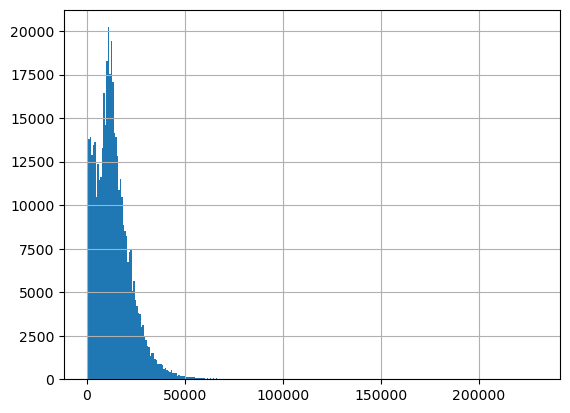

In [81]:
#гистограмма по распредению цен на авто 
data_train['sellingprice'].hist(bins=300)

<AxesSubplot:>

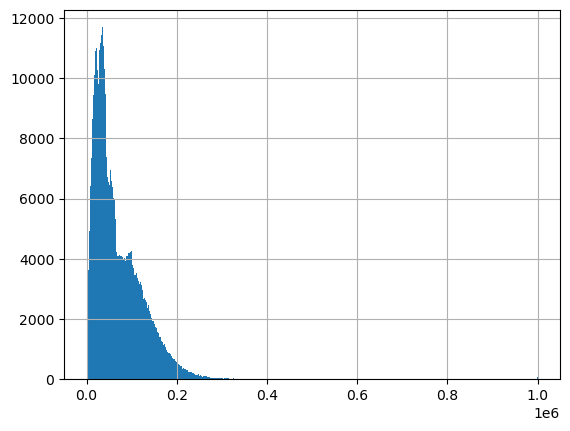

In [82]:
#гистограмма по распредению цен на авто 
data_train['odometer'].hist(bins=500)

Вывод: есть данные, где цена продажи равна нулю, их следуте удалить из датасета, как ошибки.

In [83]:
sorted_df = data_train.sort_values(by='sellingprice') 
print(sorted_df.head())

        year      make             model     trim      body transmission  \
137962  2003  mercedes           e-class     e500     sedan    automatic   
418021  2002      ford  f-350 super duty      xlt  crew cab      unknown   
262011  2008  chrysler        pt cruiser  touring     wagon    automatic   
331771  1995   mercury     grand marquis       ls     sedan      unknown   
18762   2002      ford            taurus      ses     sedan      unknown   

                      vin state condition  odometer   color interior  \
137962  wdbuf70j73a269529    ga       2.1       1.0   black    black   
418021  1ftsw31f52ed16477    ca       2.0       0.0   white     gray   
262011  3a8fy58b48t155048    hi       2.5   90335.0   white     gray   
331771  2melm75wxsx700523    ms       1.0  165658.0   green    green   
18762   1fafp55222a271061    pa       1.9  132230.0  silver     gray   

                                                  seller  sellingprice  \
137962                        people

In [84]:
sorted_series = data_train['sellingprice'].sort_values(ascending=True)
#print(sorted_series.head(20))

In [85]:
#предобработка времени - преобразуме данные в колонке saleprice, чтобы далее их можноб было разбить на новые признаки

data_train['saledate_dt'] = pd.to_datetime(data_train['saledate'], utc=True).dt.dayofweek
data_train['saledate_year'] = pd.to_datetime(data_train['saledate'], utc=True).dt.year
data_train['saledate_month'] = pd.to_datetime(data_train['saledate'], utc=True).dt.month
data_train['term of use'] = data_train['saledate_year'] - data_train['year']
                                 

print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440234 entries, 0 to 440235
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            440234 non-null  int64  
 1   make            440234 non-null  object 
 2   model           440234 non-null  object 
 3   trim            440234 non-null  object 
 4   body            440234 non-null  object 
 5   transmission    440234 non-null  object 
 6   vin             440234 non-null  object 
 7   state           440234 non-null  object 
 8   condition       440234 non-null  object 
 9   odometer        440234 non-null  float64
 10  color           440234 non-null  object 
 11  interior        440234 non-null  object 
 12  seller          440234 non-null  object 
 13  sellingprice    440234 non-null  int64  
 14  saledate        440234 non-null  object 
 15  saledate_dt     440234 non-null  int64  
 16  saledate_year   440234 non-null  int64  
 17  saledate_m

Тренировочные данные


<AxesSubplot:>

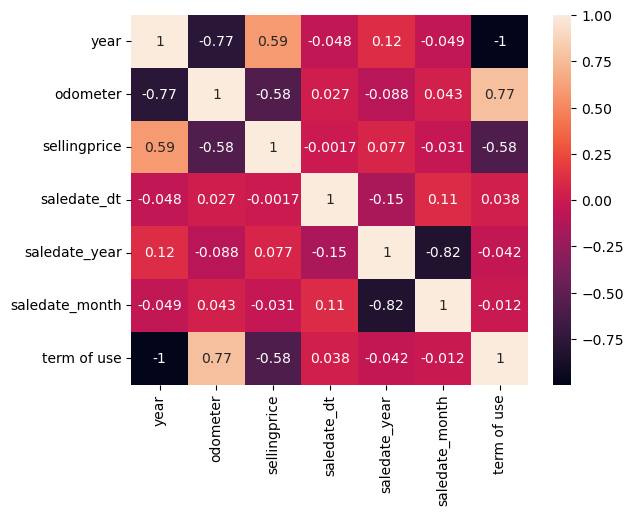

In [86]:
#тепловая карта корреляции  -проверим корреляцию данных 
print ('Тренировочные данные')
upp_mat = np.triu(data_train.corr())
sns.heatmap(data_train.corr(), annot = True)

***Вывод***
На карте видна сильная зависимость года от срока и использования, поэтому следует из признаков удалить колонку 'year'

5. Удалим из тренировочной базы данные, где цена продажи меньше 2, а также, где указаан некорректная модель.

data_train = (data_train.query('sellingprice >2')) 
data_train = (data_train.query('model != "comm"'))
data_train = (data_train.query('model != "uplandr"'))


                               
#print(data_train.query('sellingprice == 1'comm')) 
sorted_series = data_train['sellingprice'].sort_values(ascending=True)
print(sorted_series.head(20))

***Итоги предобработки данных:***

- все данные приведены к нижнему регистру;
- пропуски в графе 'condition' заполнены значением -1  и им присвоен тип  потом object, 
чтобы после кодировки они стали категориальынми значаниями;
- обработаны пробелы в датасете: в качественных данных они заменены  на "Unknown", в количественных - на ноль;
- по результатам тепловой карты было принято решение удалить признак 'year', так как он сильно коррелируте с данным по колонке odometer;
- из данных уделены строки, где цена продажи <1, как ошибочные;
- проведена унификация неявных дубликатов среди следующих признаков: model, body, color, 
- выделены новые признаки на основе данных колонки "saledate":saledate_dt - день недел, когда авто было продано, saledate_year - год продажи, saledate_month - месяц продажи и term of use - срок эксплуатации авто до продажи.

***ОБУЧЕНИЕ И ПРОВЕРКА МОДЕЛИ***

***Извлечение признаков и разбивка данных на выборки:тренирвочную и валидационную***

Удалим лишние признаки, такие как: vin, seller, state, saledate, saledate-year. Признаки vin, seller - уникальные.

Выделим по каждой базе данных обучающую и  валидационную  выборки в соотношении 75:25.

In [87]:
print(data_train.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate', 'saledate_dt', 'saledate_year', 'saledate_month',
       'term of use'],
      dtype='object')


In [94]:
# отделите 25% данных для валидационной выборки
for_sampling = data_train.drop(columns=['vin','seller', 'state', 'saledate','year'], axis=1)

#разобьем данные на выборки
df_train, df_valid = train_test_split(for_sampling, test_size=0.25, random_state=12345)

print('Размер обучающей выборки:', df_train.shape)
print('Размер валидационной выборки:',df_valid.shape)
#print(df_train.info())

Размер обучающей выборки: (330175, 14)
Размер валидационной выборки: (110059, 14)


Преобразовать категориальные признаки в численные техникой One-Hot Encoding(OHE) и уберем лишние столбцы, чтобы не попасть в дамми-ловушку

In [95]:
#проведем кодирование выборок
df_train = pd.get_dummies(df_train, drop_first=True)
df_valid = pd.get_dummies(df_valid, drop_first=True)

In [96]:
# < создаем переменные для признаков и целевого признака >
features_train = df_train.drop(['sellingprice'], axis=1)
target_train = df_train['sellingprice']

features_valid = df_valid.drop(['sellingprice'], axis=1)
target_valid = df_valid['sellingprice']


#print('Признаки в выборках')
#print('Обучающая выборка', features_train.head())
#print('Валидационная выборка', features_valid.head())
print(for_sampling.columns)

Index(['make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice', 'saledate_dt',
       'saledate_year', 'saledate_month', 'term of use'],
      dtype='object')


***Проведем стандартизацию данных***

In [97]:
#список всех численных признаков.
numeric = ['saledate_dt','odometer', 'term of use', 'saledate_month']


#создадим объект стандартизации и обучим его
scaler = StandardScaler()    
scaler.fit(features_train[numeric])
#сохраним преобразованные обучающую,валидационную и тестовую  выборки в переменные
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 


features_train_scaled = scaler.transform(features_train[numeric])
features_valid_scaled = scaler.transform(features_valid[numeric])


pd.options.mode.chained_assignment = None

print('Проверка выполения стандартизации')
print(' ')
print('обучающая выборка')
#print(features_train.head())
print('валидационная выборка')
print(features_valid.head())
                              

Проверка выполения стандартизации
 
обучающая выборка
валидационная выборка
        odometer  saledate_dt  saledate_year  saledate_month  term of use  \
47459  -1.039398    -1.187715           2015       -0.251456    -0.975924   
398626 -0.569053    -1.187715           2015        0.364746    -0.470144   
316516 -0.591212    -1.187715           2015       -0.867658    -0.723034   
397157 -0.028790     2.031449           2014        2.521451    -0.723034   
316804 -0.987707     1.226658           2015       -0.867658    -0.723034   

        make_aston martin  make_audi  make_bentley  make_bmw  make_buick  ...  \
47459                   0          0             0         0           0  ...   
398626                  0          0             0         0           0  ...   
316516                  0          0             0         0           0  ...   
397157                  0          0             0         0           0  ...   
316804                  0          0             0      

Сбросим индексы, чтобы в дальнейшем было проще сопотавлять данные по target и predicton

In [98]:
features_train = features_train.reset_index(drop=True)
features_valid = features_valid.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)
print(data_train.columns)

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate', 'saledate_dt', 'saledate_year', 'saledate_month',
       'term of use'],
      dtype='object')


Обучим модель линейной регрессии и сделаем предсказания на валидационной выборке. Сохраним предсказания на валидационной выборке.

***ВЫВОД:*** Кодирование и стандартизация проведены верно.

***ОБУЧЕНИЕ МОДЕЛЕЙ***

***Линейная регрессия*** 

In [100]:
from sklearn.metrics import mean_absolute_percentage_error
#инициализируем модель LinearRegression
model = LinearRegression()

#обучим модель
model.fit(features_train_scaled,target_train)

#получим и сохраним предсказания модели на валидационной выборке
predicted_valid = model.predict(features_valid_scaled)


mape = mean_absolute_percentage_error(target_valid, predicted_valid)
#вывод MAPE в знаени и процентах

print('Линейная регрессия')
print(f'''
MAPE   : { round(mape, 2) }
MAPE % : { round(mape*100, 2) } %
''')

Линейная регрессия

MAPE   : 0.86
MAPE % : 86.18 %



***Дерево решений***

In [101]:
#DecisionTreeRegressor
#подберем наилучшую модель, указывая глубину обученного дерева и min кол-во  объектов обучающей выборки в узле
best_depth = 0
best_est = 0
best_mape = 1
best_samples = 0
for depth in range(1, 50):
    for samples in range (2,4):
        model = DecisionTreeRegressor (max_depth=depth, criterion='squared_error', random_state=12345,      min_samples_split=samples)
        model.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
        predictions_valid = model.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
        mape = mean_absolute_percentage_error(target_valid, predictions_valid)
        if mape < best_mape:
            best_mape = mape #наименьший процент отклонения от таргета
            best_depth = depth
            best_samples = samples
print('Наилучшая глубина обученного дерева', best_depth)
print('Минимальное количество выборок', best_samples)
print('Минимальный MAPE', best_mape)
print(f'''
MAPE   : { round(best_mape, 2) }
MAPE % : { round(best_mape*100, 2) } %
''')

Наилучшая глубина обученного дерева 18
Минимальное количество выборок 3
Минимальный MAPE 0.5868085014476925

MAPE   : 0.59
MAPE % : 58.68 %



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# initializing random forest
rf = RandomForestRegressor ()

# grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[5,10,100]
           }

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(features_train_scaled,target_train)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str(model_grid.best_score_))

# random search cv
rs={'max_depth':list(np.arange(10, 100, step=10)) + [None] }

rf = RandomForestRegressor ()

rf_random = RandomizedSearchCV(rf, rs, scoring='accuracy')
model_random = rf_random.fit(features_train_scaled,target_train)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

In [ ]:
# RandomForestRegressor на основе данных grid search

model_gs = RandomForestRegressor (max_depth=10, min_samples_leaf=2, random_state=12345)
model_gs.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
predictions_valid_gs = model_gs.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
mape_gs = mean_absolute_percentage_error(target_valid, predictions_valid1)

print('RandomForestRegressor на основе данных grid search')
print(f'''
MAPE   : { round(mape_gs, 2) }
MAPE % : { round(mape_gs*100, 2) } %
''')

In [103]:
# RandomForestRegressor - подбор в одном цикле


best_depth = 0
best_est = 0
best_mape = 1
best_samples = 0
for depth in range(1, 20):
    for est in range (1,20):
        model1 = RandomForestRegressor (max_depth=depth, n_estimators = est, min_samples_leaf=2, random_state=12345)
        model1.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
        predictions_valid1 = model1.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
        mape1 = mean_absolute_percentage_error(target_valid, predictions_valid1)
        if mape1 < best_mape:
            best_mape = mape1
            best_depth = depth
            best_est = est
print('Наибольшая доля правильных ответов:', best_mape) 
print('Наилучшая глубина обученного дерева', best_depth)
print('Минимальное количество выборок', best_est)
print(f'''
MAPE   : { round(best_mape, 2) }
MAPE % : { round(best_mape*100, 2) } %
''')

Наибольшая доля правильных ответов: 0.5654301702988175
Наилучшая глубина обученного дерева 19
Минимальное количество выборок 8

MAPE   : 0.57
MAPE % : 56.54 %



In [104]:
# 1 этап - RandomForestRegressor


best_depth2 = 0
best_mape = 1
best_samples = 0

for depth in range (2,50):
    model2 = RandomForestRegressor (max_depth=depth, min_samples_leaf=2, random_state=12345)
    model2.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
    predictions_valid2 = model2.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
    mape2 = mean_absolute_percentage_error(target_valid, predictions_valid2)
    if mape2 < best_mape:
        best_mape = mape2
        best_depth2 = depth
        #best_est = est
       
print('Наибольшая доля правильных ответов:', best_mape) 
print('Наилучшая глубина обученного дерева', best_depth2)
#print('Минимальное количество выборок', best_est)
print(f'''
MAPE   : { round(best_mape, 2) }
MAPE % : { round(best_mape*100, 2) } %
''')

Наибольшая доля правильных ответов: 0.5657463344583691
Наилучшая глубина обученного дерева 20

MAPE   : 0.57
MAPE % : 56.57 %



In [107]:
# 2 этап - RandomForestRegressor


best_depth = 20
best_est2 = 0
best_mape = 0.57
best_samples = 0

for est in range (2,50):
    model1 = RandomForestRegressor (n_estimators = est, max_depth=20, random_state=12345)
    model1.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
    predictions_valid1 = model1.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
    mape1 = mean_absolute_percentage_error(target_valid, predictions_valid2)
    if mape1 < best_mape:
        best_mape = mape1
       # best_depth = depth
        best_est2 = est
       
print('Наибольшая доля правильных ответов:', best_mape) 
#print('Наилучшая глубина обученного дерева', best_depth)
print('Минимальное количество выборок', best_est2)
print(f'''
MAPE   : { round(best_mape, 2) }
MAPE % : { round(best_mape*100, 2) } %
''')


Наибольшая доля правильных ответов: 0.5676116304506503
Минимальное количество выборок 2

MAPE   : 0.57
MAPE % : 56.76 %



In [115]:
#Модель XGboost 1 этап
best_depth3 = 0

best_mape = 1
best_samples = 0

for depth in range (2,20):
    model3 = GradientBoostingRegressor (max_depth=depth, random_state=12345, loss='absolute_error')
    model3.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
    predictions_valid3 = model3.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
    mape3 = mean_absolute_percentage_error(target_valid, predictions_valid3)
    if mape3 < best_mape:
        best_mape = mape3 #наименьший процент отклонения от таргета
        best_depth = depth
print('Наибольшая доля правильных ответов:', best_mape) 
print('Наилучшая глубина обученного дерева', best_depth)

print(f'''
MAPE   : { round(best_mape, 2) }
MAPE % : { round(best_mape*100, 2) } %
''')

Наибольшая доля правильных ответов: 0.4851142393685383
Наилучшая глубина обученного дерева 11

MAPE   : 0.49
MAPE % : 48.51 %



In [118]:

#Модель XGboost - 2 этап 
best_depth = best_depth3
#best_est = 0.4851
best_mape = 0.4851
best_samples = 0
    
for est in range (2,20):
    model3 = GradientBoostingRegressor (n_estimators=est, max_depth=11, random_state=12345, loss='absolute_error')
    model3.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
    predictions_valid3 = model3.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
    mape3 = mean_absolute_percentage_error(target_valid, predictions_valid3)
    if mape3 < best_mape:
        best_mape = mape3 #наименьший процент отклонения от таргета
        #best_depth = depth
        best_est = est
print('Наибольшая доля правильных ответов:', best_mape) 
#print('Наилучшая глубина обученного дерева', best_depth)
print('Минимальное количество выборок', best_est)

print(f'''
MAPE   : { round(best_mape, 2) }
MAPE % : { round(best_mape*100, 2) } %
''')

Наибольшая доля правильных ответов: 0.4851
Минимальное количество выборок 19

MAPE   : 0.49
MAPE % : 48.51 %



In [119]:
#GradientBoostingRegressor - случайная без подбора
best_depth = 0
best_est = 0
best_mape = 1
best_samples = 0


model = GradientBoostingRegressor (loss='absolute_error')
model.fit(features_train_scaled,target_train) # # обучаем модель на тренировочной выборке
predictions_valid = model.predict(features_valid_scaled) # посчитаем качество модели на валидационной выборк
mape = mean_absolute_percentage_error(target_valid, predictions_valid3)


print(f'''
MAPE   : { round(mape, 2) }
MAPE % : { round(mape*100, 2) } %
''')



MAPE   : 0.62
MAPE % : 61.56 %



In [ ]:
# initializing GradientBoostingRegressor
rf = GradientBoostingRegressor ()

# grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[5,10,100]
           }

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(features_train_scaled,target_train)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str(model_grid.best_score_))

# random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None] }

rf = GradientBoostingRegressor ()

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(features_train_scaled,target_train)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

***ВЫВОД***

Получили следующие метрики MAPE по моделям:
 - линейная регрессия - 86.18%
 - дерево решение - 58.68%
 - случайный лес - 56.54%
 - XGboost - 48.51%
 
Наилучшую метрику показада модель XGboost, поэтому она будет использована в прогнозе цены авто на вторичном рынке на тестовой выборке.
 

***Тестирование модели***

In [121]:
#тестовые  данные
from io import BytesIO
import requests
spreadsheet_id = '1f8tWeaIP1GdUUmYq7AzqovUEbPxwf9n64EUTbJgGpTw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_test = pd.read_csv(BytesIO(r.content))
#data_test
#data_test.info()

***ПРЕДОБРАБОТКА ДАННЫХ В ТЕСТОВОЙ ВЫБОРКЕ (аналогична проведенной в тренировочной выборке)***

In [122]:
vin  = data_test['vin']


In [123]:
#обрабоатем неявные дубликаты, приведя названия в колонке к нижнему регистру 
data_test['make'] = data_test['make'].str.lower()
data_test['model'] = data_test['model'].str.lower()
data_test['trim'] = data_test['trim'].str.lower()
data_test['body'] = data_test['body'].str.lower()
data_test['transmission'] = data_test['transmission'].str.lower()
data_test['state'] = data_test['state'].str.lower()
data_test['color'] = data_test['color'].str.lower()
data_test['interior'] = data_test['interior'].str.lower()



In [124]:
#измение типа данных, чтобы признак стал категориальным при кодировке
data_test['condition'] = data_test['condition'].astype(object)

In [125]:
#убработка пропусков

column_to_replace = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'condition']
for i in column_to_replace:
    data_test[i] = data_test[i].fillna('unknown')

    
data_test['odometer'] = data_test['odometer'].fillna(0)


#print(data_test.isna().sum())

In [126]:
#заменя неявных дубликатов производителей (make)

data_test['make'] = data_test['make'].replace ('honda','hyundai')
data_test['make'] = data_test['make'].replace ('mercedes-benz','mercedes')
data_test['make'] = data_test['make'].replace ('mercedes-b','mercedes')
data_test['make'] = data_test['make'].replace ('vw','wolkswagen')
data_test['make'] = data_test['make'].replace ('landrover','land rover')
data_test['make'] = data_test['make'].replace ('dodge tk','dodge truck')
data_test['make'] = data_test['make'].replace ('mazda tk','mazda truck')
data_test['make'].unique()

data_test['make'].unique()

array(['cadillac', 'gmc', 'nissan', 'chevrolet', 'volkswagen', 'hyundai',
       'ford', 'infiniti', 'subaru', 'kia', 'bmw', 'unknown',
       'mitsubishi', 'dodge', 'oldsmobile', 'volvo', 'pontiac', 'acura',
       'toyota', 'audi', 'jeep', 'lincoln', 'chrysler', 'mercedes', 'ram',
       'scion', 'mercury', 'lexus', 'saturn', 'mazda', 'porsche', 'mini',
       'smart', 'buick', 'hummer', 'jaguar', 'fiat', 'saab', 'suzuki',
       'land rover', 'geo', 'chev truck', 'bentley', 'isuzu',
       'aston martin', 'maserati', 'daewoo', 'wolkswagen', 'tesla',
       'ferrari', 'fisker', 'rolls-royce', 'lotus', 'plymouth',
       'hyundai tk', 'ford tk'], dtype=object)

In [127]:
#обработка неявных дубликатов среди моделдей авто 

#mazda

data_test['model'] = data_test['model'].replace ('mazdaspeed mazda3','mazdaspeed 3')
data_test['model'] = data_test['model'].replace ('mazdaspeed3','mazdaspeed 3')
data_test['model'] = data_test['model'].replace ('3','mazdaspeed 3')
data_test['model'] = data_test['model'].replace ('rx8','rx-8')
data_test['model'] = data_test['model'].replace ('6','mazda6')
data_test['model'] = data_test['model'].replace ('mazdaspeed mx-5 miata','mx-5 miata')
data_test['model'] = data_test['model'].replace ('mazdaspeed protege','protege')
data_test['model'] = data_test['model'].replace ('b-series truck','b-series pickup')
data_test['model'] = data_test['model'].replace ('truck','b-series pickup')
data_test['model'] = data_test['model'].replace ('b-series','b-series pickup')
data_test['model'] = data_test['model'].replace ('mazdaspeed mazda6','mazda6')
data_test['model'] = data_test['model'].replace ('mazdaspeed 3','mazda3')

#ford
data_test['model'] = data_test['model'].replace ('mazdaspeed mx-5 miata','mx-5 miata')
data_test['model'] = data_test['model'].replace ('e-150','e150')
data_test['model'] = data_test['model'].replace ('e-250','e250')
data_test['model'] = data_test['model'].replace ('e-350','e350')
data_test['model'] = data_test['model'].replace ('f250','f-250 super duty')
#упрощение
#data_train['model'] = data_train['model'].replace ('f150','f-150')
#data_train['model'] = data_train['model'].replace ('f-150 heritage','f-150')
#data_train['model'] = data_train['model'].replace ('f-150 svt lightning','f-150')
#data_train['model'] = data_train['model'].replace ('f-350 super duty','f-350')
#data_train['model'] = data_train['model'].replace ('f350','f-350')
#data_train['model'] = data_train['model'].replace ('f-250 super duty','f-250')
#data_train['model'] = data_train['model'].replace ('f-250 super duty','f-250')
#data_train['model'] = data_train['model'].replace ('c-max hybrid','c-max')
#data_train['model'] = data_train['model'].replace ('c-max energi','c-max')
#data_train['model'] = data_train['model'].replace ('explorer sport','explorer')
#data_train['model'] = data_train['model'].replace ('mustang svt cobra','mustang')
#data_train['model'] = data_train['model'].replace ('expedit','expedition')
#data_train['model'] = data_train['model'].replace ('focus st','focus')
#data_train['model'] = data_train['model'].replace ('fusion energi','fusion')
#data_train['model'] = data_train['model'].replace ('fusion hybrid','fusion')
#data_train['model'] = data_train['model'].replace ('explorer sport trac','explorer')
#data_train['model'] = data_train['model'].replace ('expeditn','explorer')
#data_train['model'] = data_train['model'].replace ('expedition el','explorer')


#chevrole

data_test['model'] = data_test['model'].replace ('1500','ilverado 1500')

#nissan
data_test['model'] = data_test['model'].replace ('pathfind ','pathfinder')

#dodge
data_test['model'] = data_test['model'].replace ('ram3500 ','ram pickup 3500')
data_test['model'] = data_test['model'].replace ('b1500','ram pickup 1500')
data_test['model'] = data_test['model'].replace ('gr','grand')

#bmw
data_test['model'] = data_train['model'].replace ('x5','5 series')
data_test['model'] = data_train['model'].replace ('x3','3 series')
data_test['model'] = data_train['model'].replace ('x1','1 series')

data_test['model'] = data_test['model'].replace ('x6','6 series')
data_test['model'] = data_test['model'].replace ('x4','4 series')
data_test['model'] = data_test['model'].replace ('7','7 series')


#chrysler
data_test['model'] = data_test['model'].replace ('twn&country','town and country')
data_test['model'] = data_test['model'].replace ('twn/cntry','town and country')
data_test['model'] = data_test['model'].replace ('pt','pt cruiser')
data_test['model'] = data_test['model'].replace ('town','town and country')

#упрощение
#data_train['model'] = data_train['model'].replace ('2500','sierra 2500')
#data_train['model'] = data_train['model'].replace ('g2500','sierra 2500')
#data_train['model'] = data_train['model'].replace ('c/k 2500 series','sierra 2500')
#data_train['model'] = data_train['model'].replace ('c/k 3500 series','silverado 3500')
#data_train['model'] = data_train['model'].replace ('3500','silverado 3500')
#data_train['model'] = data_train['model'].replace ('s-10 blazer','blazer')
#data_train['model'] = data_train['model'].replace ('trailblazer ext','blazer')
#data_train['model'] = data_train['model'].replace ('trailblazer ext','blazer')
#data_train['model'] = data_train['model'].replace ('sierra 2500','sierra 2500')
#data_train['model'] = data_train['model'].replace ('capt ','captiva sport')
#data_train['model'] = data_train['model'].replace ('silverado 1500 classic','silverado 1500')
#data_train['model'] = data_train['model'].replace ('silverado 1500hd','silverado 1500')
#data_train['model'] = data_train['model'].replace ('1500','silverado 1500')
#data_train['model'] = data_train['model'].replace ('c/k 1500 series','silverado 1500')
#data_train['model'] = data_train['model'].replace ('g3500','silverado 3500')
#data_train['model'] = data_train['model'].replace ('silverado 2500hd classic','silverado 2500')
#data_train['model'] = data_train['model'].replace ('silverado 1500 hybrid','silverado 1500')
#data_train['model'] = data_train['model'].replace ('g3500','silverado 1500')
#data_train['model'] = data_train['model'].replace ('silverado 2500hd ','silverado 2500')
#data_train['model'] = data_train['model'].replace ('silverado 3500 classic','silverado 3500')
#data_train['model'] = data_train['model'].replace ('tahoe limited/z71','tahoe')
#data_train['model'] = data_train['model'].replace ('tahoe hybrid','tahoe')
#data_train['model'] = data_train['model'].replace ('g1500','silverado 1500')
#data_train['model'] = data_train['model'].replace ('impala limited','impala')
#data_train['model'] = data_train['model'].replace ('s-10','blazer')
#data_train['model'] = data_train['model'].replace ('s10','blazer')
#data_train['model'] = data_train['model'].replace ('capt','captiva sport')
#data_train['model'] = data_train['model'].replace ('malibu maxx','malibu')
#data_train['model'] = data_train['model'].replace ('malibu classic','malibu')
#data_train['model'] = data_train['model'].replace ('3500 ','silverado 3500')
#data_train['model'] = data_train['model'].replace ('corvette stingray','corvette')
#data_train['model'] = data_train['model'].replace ('spark ev ','spark')
#data_train['model'] = data_train['model'].replace ('black diamond avalanche','avalanche')
#data_train['model'] = data_train['model'].replace ('malibu hybrid','malibu')
#data_train['model'] = data_train['model'].replace ('malibu hybrid ','malibu')


#toyota
data_train['model'] = data_train['model'].replace ('pathfind ','pathfinder')

#упрощение
##data_train['model'] = data_train['model'].replace ('camry hybrid','camry')
#data_train['model'] = data_train['model'].replace ('highlander hybrid','highlander')
#data_train['model'] = data_train['model'].replace ('camry hybrid','camry')
#data_train['model'] = data_train['model'].replace ('camry solara','camry')
#data_train['model'] = data_train['model'].replace ('prius c','prius')
#data_train['model'] = data_train['model'].replace ('prius v','prius')
#data_train['model'] = data_train['model'].replace ('prius plug-in','prius')
#data_train['model'] = data_train['model'].replace ('avalon hybrid','avalon')



#nissan - упрощение
#data_train['model'] = data_train['model'].replace ('versa note','versa')
#data_train['model'] = data_train['model'].replace ('rogue select','rogue')
##data_train['model'] = data_train['model'].replace ('altima hybrid','altima')
#data_train['model'] = data_train['model'].replace ('murano crosscabriolet','murano')
#data_train['model'] = data_train['model'].replace ('pathfind','pathfinder')

#mercedes
data_test['model'] = data_test['model'].replace ('500-class','s-class')
data_test['model'] = data_test['model'].replace ('c240w','c-class')
data_test['model'] = data_test['model'].replace ('c230wz','c-class')
data_test['model'] = data_test['model'].replace ('300e','e-class')
data_test['model'] = data_test['model'].replace ('cl55','c-class')
data_test['model'] = data_test['model'].replace ('s55','s-class')
data_test['model'] = data_test['model'].replace ('b200','b-class')
data_test['model'] = data_test['model'].replace ('b-class electric drive','b-class')
data_test['model'] = data_test['model'].replace ('c240s','c-class')
data_test['model'] = data_test['model'].replace ('c230','c-class')
data_test['model'] = data_test['model'].replace ('sl55','s-class')
data_test['model'] = data_test['model'].replace ('g500','g-class')
data_test['model'] = data_test['model'].replace ('g55','g-class')
data_test['model'] = data_test['model'].replace ('ml55 amg','m-class')
data_test['model'] = data_test['model'].replace ('420sel','s-class')
data_test['model'] = data_test['model'].replace ('e300dt','e-class')
data_test['model'] = data_test['model'].replace ('420-class','s-class')

#jeep
data_test['model'] = data_test['model'].replace ('grand','grand cherokee')
 
#gmc    
data_test['model'] = data_test['model'].replace ('safari cargo','safari')
data_test['model'] = data_test['model'].replace ('sierra 1500 hybrid','sierra 1500hd')  
    
    
#унификация цветов
data_test['color'] = data_test['color'].replace ('off-white','white')
data_test['color'] = data_test['color'].replace ('charcoal','gray')
data_test['color'] = data_test['color'].replace ('—','nan')



#интеррьер
data_test['interior'] = data_test['interior'].replace ('off-white','white')

#замена неявных дубликатов  в типе кузова
data_test['body'] = data_test['body'].replace ('regular-cab','regular cab')

In [128]:
#предобработка даты
data_test['saledate_dt'] = pd.to_datetime(data_test['saledate'], utc=True).dt.dayofweek
data_test['saledate_year'] = pd.to_datetime(data_test['saledate'], utc=True).dt.year
data_test['saledate_month'] = pd.to_datetime(data_test['saledate'], utc=True).dt.month
data_test['term of use'] = data_test['saledate_year'] - data_test['year']
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110060 entries, 0 to 110059
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            110060 non-null  int64  
 1   make            110060 non-null  object 
 2   model           110059 non-null  object 
 3   trim            110060 non-null  object 
 4   body            110060 non-null  object 
 5   transmission    110060 non-null  object 
 6   vin             110060 non-null  object 
 7   state           110060 non-null  object 
 8   condition       110060 non-null  object 
 9   odometer        110060 non-null  float64
 10  color           110060 non-null  object 
 11  interior        110060 non-null  object 
 12  seller          110060 non-null  object 
 13  saledate        110060 non-null  object 
 14  saledate_dt     110060 non-null  int64  
 15  saledate_year   110060 non-null  int64  
 16  saledate_month  110060 non-null  int64  
 17  term of us

In [129]:
data_test = data_test.drop(columns=['vin','seller', 'saledate', 'year', 'saledate_year'], axis=1)
#кодирование
features_test = pd.get_dummies(data_test, drop_first=True)



#список всех численных признаков.
numeric1 = ['saledate_dt','odometer','term of use', 'saledate_month']


#создадим объект стандартизации и обучим его
scaler = StandardScaler()    
scaler.fit(features_test[numeric])
#сохраним преобразованные обучающую,валидационную и тестовую  выборки в переменные
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 




features_test_scaled = scaler.transform(features_test[numeric1])

pd.options.mode.chained_assignment = None
print(data_test.head())

        make   model      trim      body transmission state condition  \
0   cadillac    edge      base     sedan    automatic    ca       2.7   
1        gmc  fusion      2500       van      unknown    pa       4.4   
2     nissan  sentra         s       suv    automatic    oh       4.6   
3  chevrolet      h2  ls fleet     sedan    automatic    fl       2.3   
4     nissan  fusion        sv  crew cab    automatic    tn       2.9   

   odometer   color interior  saledate_dt  saledate_month  term of use  
0  116970.0  silver    black            1               1           10  
1    6286.0   white     gray            3               2            1  
2   11831.0    gray    black            0               2            2  
3   57105.0  silver    black            3               3            2  
4   31083.0   black    black            1               6            2  


In [130]:
#проверим работу модели на тестовой выборке
model = GradientBoostingRegressor (n_estimators=19, max_depth=11, random_state=12345, loss='absolute_error')
model.fit(features_train_scaled,target_train)
sellingprice = model.predict(features_test_scaled) # посчитаем качество модели на валидационной выборке

print(sellingprice)



[2982.16458786 3292.84318993 2545.10288262 ... 4269.06458786 2301.14282587
 2242.37322176]


***Sample_submition***

In [131]:
#выделение данных для загрузки на Kaggle
submition = pd.DataFrame([vin, sellingprice])
submition = submition.T
submition = submition.rename(columns={'Unnamed 0': 'sellingprice'})
print(submition.head(3))

                 vin sellingprice
0  1g6dp567450124779  2982.164588
1  1gtw7fca7e1902207   3292.84319
2  jn8az1mw6dw303497  2545.102883


In [132]:
#проверка количества строк
submition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110060 entries, 0 to 110059
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   vin           110060 non-null  object
 1   sellingprice  110060 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [133]:
#выгрузка DataFrame to CSV file для загрузки на Kaggle
submition.to_csv (r'C:\Users\LeeLoo\Documents\GitHub\Kaggle_Estimating--value-of--car-on-the-secondary-market\submition.csv', index= False )

***ИТОГОВЫЙ ВЫВОД***

В проекте перед нами стояла задача построить модель, способную предсказывать стоимость автомобиля на вторичном рынке. Для этого был использован тренировочный датасет размером  в 440 236 строк и 15 колонок с признаками, в том числе целевым - ценой продажи.

Мы проделали следующую работу по предобработке данных:
- все данные приведены к нижнему регистру;
- пропуски в графе 'condition' заполнены значением -1  и им присвоен тип  потом object, 
чтобы после кодировки они стали категориальными значениями;
- обработаны пробелы в датасете: в качественных данных они заменены  на "Unknown", в количественных - на ноль;
- по результатам тепловой карты было принято решение удалить признак 'year', так как он сильно коррелирует с данным по колонке odometer;
- из данных уделены строки, где цена продажи <1, как ошибочные;
- проведена унификация неявных дубликатов среди следующих признаков: model, body, color, 
- выделены новые признаки на основе данных колонки "saledate":saledate_dt - день недели, когда авто было продано, saledate_year - год продажи, saledate_month - месяц продажи и term of use - срок эксплуатации авто до продажи.

Далее данные были разбиты в пропорции 75*25 на тренировочную и валидационную выборки. После чего проведено прямое кодирование данных методом OHE с стандартизация количественных признаков.

Мы обучили 4 модели: линейной регрессии, дерева решений, случайного леса и  XGboost.

Получили следующие метрики MAPE по моделям:
 - линейная регрессия - 86.18%
 - дерево решение - 58.68%
 - случайный лес - 56.54%
 - XGboost - 48.51%
 
 Наименьший процент отклонения цены от таргета показала модель XGboost, её использовали на тестовой выборке. При этом тестовые данные прошли такую же предобработку, как и тренировочные.
 
Работу над проектом следует продолжить, чтобы уменьшит показатель MAPE. В планах изучить, какое влияние на метрку окажет разработка и внедрение новых синтетических призназнаков.